# 4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）


https://github.com/ChannelCMT/formula/wiki

数据类型和周期自定

## （1）因子1：ROC20，20日变动速率(20-day Price Rate of Change). 是一个动能指标，其以当日的收盘价和N天前的收盘价比较，通过计算股价某一段时间内收盘价变动的比例，应用价格的移动比较来测量价位动量

In [170]:
import warnings
warnings.filterwarnings('ignore')

from time import time

from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()

## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance',
         'freq':'30Min,1H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据

In [171]:
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv1H = HFDataView()
dv1H.create_init_dv(Time_dict['1H'].dropna().set_index(["trade_date","symbol"]))

Initialize dataview success.


In [172]:
import matplotlib.pyplot as plt
import pandas as pd

def Plot_Mean(dv, ROC, chart_name='dv_ROC', n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(ROC.iloc[n:], alpha=1)
    #ax1.hlines(0, SI.iloc[n:].index[0], VOSC_J.iloc[n:].index[-1], alpha=0.4, linestyle='--')
    # plt.savefig(chart_name)
    plt.show()

In [173]:
dv1H.add_formula('ROC20', '((close/Delay(close, 20))-1)*100' , add_data=True)

symbol,BTCUSDT:binance
trade_date,
20180601000000,NaN
20180601010000,NaN
20180601020000,NaN
20180601030000,NaN
20180601040000,NaN
20180601050000,NaN
20180601060000,NaN
20180601070000,NaN
20180601080000,NaN


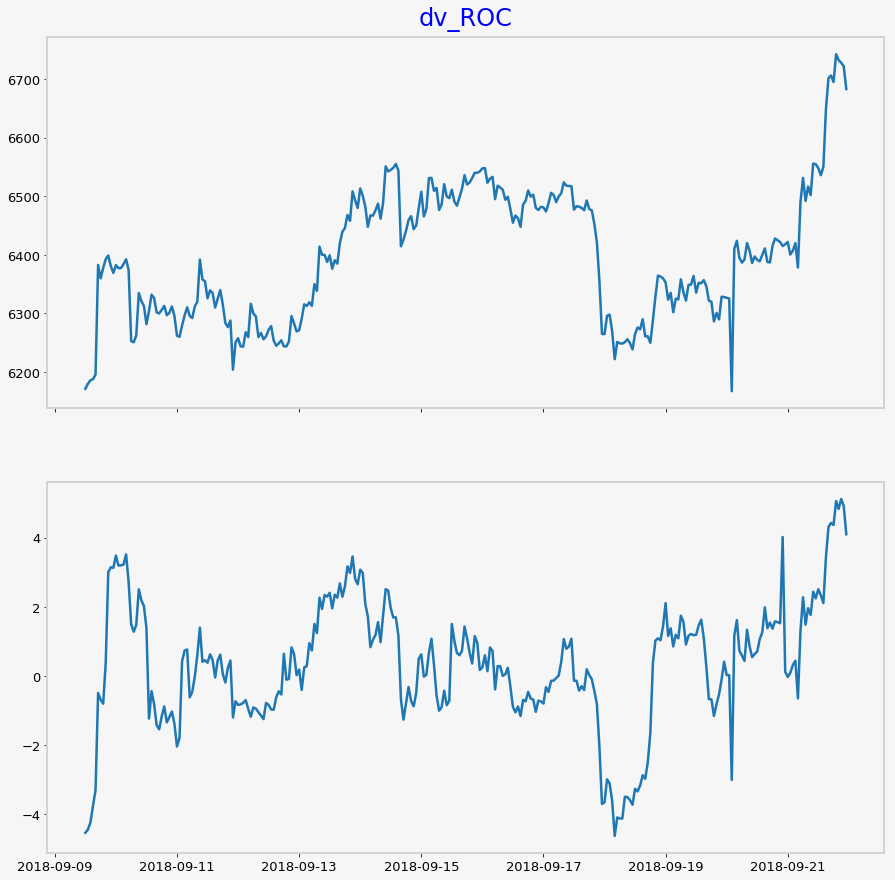

In [174]:
roc = dv1H.get_ts('ROC20', date_type='datetime')

Plot_Mean(dv1H, roc.iloc[:,0], n=-300)

### 对比BTCUSDT收盘价与其ROC20指标的图表，发现ROC20与标的物价格图在趋势上能够部分吻合，主要表现为ROC20几乎领先标的物价格变动趋势或与其一致。

## （2）因子2：MACD，经典的技术指标

In [175]:
import warnings
from jaqs_fxdayu.data.dataservice import LocalDataService
warnings.filterwarnings('ignore')
ds = LocalDataService()

## 加freq参数
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume',
         'symbol': 'BTCUSDT:binance',
         'freq': '1H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据

data1H = Time_dict.set_index('datetime')

import matplotlib.pyplot as plt
import pandas as pd

def Plot_Mean_2(dv, MACD, Diff, Dea, chart_name='dv_MACD', n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(MACD.iloc[n:], alpha=1)
    ax1.plot(Diff.iloc[n:], alpha=0.5)
    ax1.plot(Dea.iloc[n:], alpha=0.4)
    ax1.hlines(0, MACD.iloc[n:].index[0], MACD.iloc[n:].index[-1], alpha=0.4, linestyle='--')
    # plt.savefig(chart_name)
    plt.show()

from jaqs_fxdayu.data.hf_dataview import HFDataView

dv1H = HFDataView()
dv1H.create_init_dv(Time_dict.dropna().set_index(["trade_date","symbol"]))

dv1H.add_formula('Diff_J',"Ta('EMA',0,0,0,0,close,0,12)-Ta('EMA',0,0,0,0,close,0,26)", add_data=True)
dv1H.add_formula('Dea_J',"Ta('EMA',0,0,0,0,Diff_J,0,9)", add_data=True)
dv1H.add_formula('MACD_J',"(Diff_J-Dea_J)*2",add_data=True)

Initialize dataview success.


symbol,BTCUSDT:binance
trade_date,
20180601000000,NaN
20180601010000,NaN
20180601020000,NaN
20180601030000,NaN
20180601040000,NaN
20180601050000,NaN
20180601060000,NaN
20180601070000,NaN
20180601080000,NaN


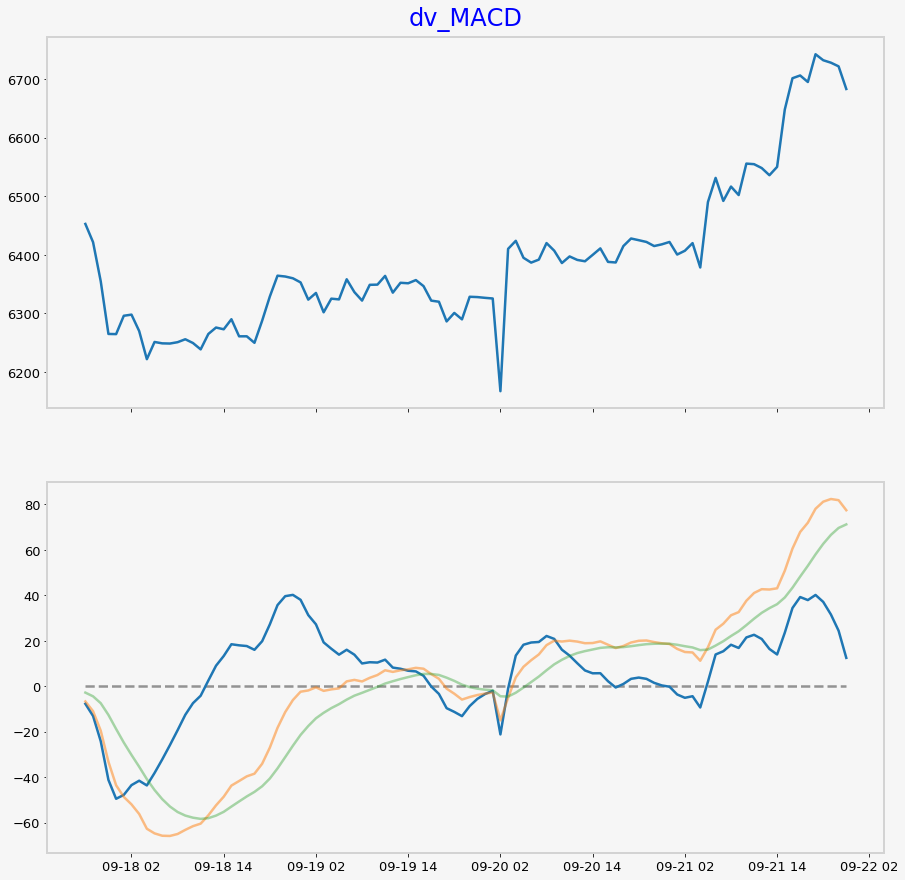

In [176]:
MACD = dv1H.get_ts('MACD_J', date_type='datetime')
Diff = dv1H.get_ts('Diff_J', date_type='datetime')
Dea = dv1H.get_ts('Dea_J', date_type='datetime')

Plot_Mean_2(dv1H, MACD.iloc[:,0], Diff.iloc[:,0], Dea.iloc[:,0], n=-100)

### 通过观察发现通过观察发现MACD与价格的升降趋势有关，主要表现为MACD（蓝线）上穿0值时出现上涨趋势，下穿0值时出现下跌趋势。

# 5、观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，提出自己信号进出场的假设。（分别完成两个因子的信号假设）

信号进出场假设：可以借鉴MastatiscResearch，但不要将思路假设局限在均线上，可以观察大盘上的其他现象来写信号假设，也可以进行同时满足多个因子的信号来设计信号假设等等。

此处需要说出联系、找到的信号、你的信号进出场假设是什么

### （1）ROC20因子与价格图的联系比较简单且直接，即ROC20因子有一定的领先趋势，会在一定程度先于标的价格图发生同向变动，故我们可以通过对ROC20因子设置短期（4日、20日）的MA金叉死叉策略来对BTCUSDT的多空进行有效预测并套利，假设的信号为金叉买入、死叉卖出；

### （2）当MACD指标从下向上穿过0时为买入信号，价格图中反映为一定的上涨趋势；从上向下穿过0时为卖出信号，价格图中为下跌趋势，以此来构建策略。

# 6、将你的其中一个假设落实，如果能完成两个更好，但不强求

利用TimingSignal最后输出long、short、long_short这三个绩效表出来

### （1）ROC20因子

In [177]:
dv1H.add_formula('ROC20', '((close/Delay(close, 20))-1)*100' , add_data=True)

# 进场信号

long = dv1H.add_formula("longROC20","If((Ts_Mean(ROC20,4)>Ts_Mean(ROC20,20)) && (Delay(Ts_Mean(ROC20,4),1)<=Delay(Ts_Mean(ROC20,20),1)),2,0)", add_data=True)
short = dv1H.add_formula("shortROC20","If((Ts_Mean(ROC20,4)<Ts_Mean(ROC20,20)) && (Delay(Ts_Mean(ROC20,4),1)>=Delay(Ts_Mean(ROC20,20),1)),-2,0)", add_data=True)

# 出场信号
close_long = dv1H.add_formula("closeLongROC20","If(shortROC20==-2,1,0)", add_data=True)
close_short = dv1H.add_formula("closeShortROC20","If(longROC20==2,-1,0)", add_data=True)

In [178]:
dv1H.get_ts('longROC20').stack()[dv1H.get_ts('longROC20').stack()==2].tail()

trade_date      symbol         
20180916040000  BTCUSDT:binance    2.0
20180917030000  BTCUSDT:binance    2.0
20180918150000  BTCUSDT:binance    2.0
20180920060000  BTCUSDT:binance    2.0
20180921080000  BTCUSDT:binance    2.0
dtype: float64

In [179]:
from jaqs_fxdayu.research import TimingDigger

tdMa = TimingDigger(output_folder=".", output_format='pdf',signal_name='Ma')

def TimingSignal(td, dv, long='long', short='short',closeLong='closeLong', closeShort='closeShort'\
                 , mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称

    #多空信号分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

In [180]:
from jaqs_fxdayu.research import TimingDigger

tdAlpha1 = TimingDigger(output_folder=".", output_format='pdf',signal_name='ROC20')

TimingSignal(tdAlpha1, dv1H,'longROC20','shortROC20','closeLongROC20','closeShortROC20', 100, 0.05, 0.3)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 3%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 3%


In [181]:
tdAlpha1.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               5.469  -5.417   1.770
p-value              0.000   0.000   0.081
mean                 0.014  -0.009   0.004
std                  0.017   0.010   0.018
info_ratio           0.844  -0.943   0.203
skewness             1.881  -1.666   1.123
kurtosis             2.865   1.841   3.056
pct5                 0.001  -0.031  -0.025
pct25                0.003  -0.012  -0.005
pct50                0.008  -0.005   0.002
pct75                0.017  -0.003   0.010
pct95                0.052  -0.002   0.037
occurance           43.000  34.000  77.000
win_ratio              NaN     NaN   0.558
win_mean/loss_mean     NaN     NaN   1.500


In [182]:
tdAlpha1.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               5.165  -5.907   1.420
p-value              0.000   0.000   0.160
mean                 0.025  -0.016   0.005
std                  0.031   0.016   0.032
info_ratio           0.827  -0.971   0.162
skewness             1.859  -1.595   1.319
kurtosis             3.198   2.468   3.666
pct5                 0.001  -0.047  -0.034
pct25                0.004  -0.024  -0.008
pct50                0.015  -0.010   0.001
pct75                0.035  -0.005   0.015
pct95                0.094  -0.001   0.058
occurance           40.000  38.000  78.000
win_ratio              NaN     NaN   0.513
win_mean/loss_mean     NaN     NaN   1.587


In [183]:
tdAlpha1.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                       win    loss      all
t-stat               7.067  -7.676    2.117
p-value              0.000   0.000    0.036
mean                 0.020  -0.013    0.004
std                  0.025   0.014    0.026
info_ratio           0.780  -0.911    0.171
skewness             2.264  -1.879    1.451
kurtosis             5.754   3.936    5.368
pct5                 0.001  -0.038   -0.031
pct25                0.004  -0.018   -0.006
pct50                0.010  -0.006    0.001
pct75                0.026  -0.003    0.010
pct95                0.064  -0.001    0.051
occurance           83.000  72.000  155.000
win_ratio              NaN     NaN    0.535
win_mean/loss_mean     NaN     NaN    1.517


### （2）MACD指标

In [184]:
dv1H.add_formula('Diff_J',"Ta('EMA',0,0,0,0,close,0,12)-Ta('EMA',0,0,0,0,close,0,26)", add_data=True)
dv1H.add_formula('Dea_J',"Ta('EMA',0,0,0,0,Diff_J,0,9)", add_data=True)
dv1H.add_formula('MACD_J',"(Diff_J-Dea_J)*2",add_data=True)

# 进场信号
long = dv1H.add_formula("longMACD","If(Diff_J > Dea_J,2,0)", add_data=True)
short = dv1H.add_formula("shortMACD","If(Diff_J < Dea_J,-2,0)", add_data=True)

# 出场信号
close_long = dv1H.add_formula("closeLongMACD","If(shortMACD==-2,1,0)", add_data=True)
close_short = dv1H.add_formula("closeShortMACD","If(longMACD==2,-1,0)", add_data=True)

Field [Diff_J] is overwritten.
Field [Dea_J] is overwritten.
Field [MACD_J] is overwritten.


In [185]:
from jaqs_fxdayu.research import TimingDigger

tdMACD = TimingDigger(output_folder=".", output_format='pdf',signal_name='MACD')

TimingSignal(tdMACD, dv1H,'longMACD','shortMACD','closeLongMACD','closeShortMACD', 100, 0.05, 0.3)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 49%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 49%


In [186]:
tdMACD.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                        win     loss       all
t-stat               16.771  -27.177    -3.330
p-value               0.000    0.000     0.001
mean                  0.013   -0.011    -0.002
std                   0.017    0.011     0.018
info_ratio            0.751   -0.956    -0.092
skewness              2.270   -1.731     1.137
kurtosis              5.481    3.011     5.294
pct5                  0.000   -0.035    -0.029
pct25                 0.002   -0.014    -0.009
pct50                 0.006   -0.006    -0.002
pct75                 0.018   -0.003     0.003
pct95                 0.050   -0.001     0.029
occurance           500.000  809.000  1309.000
win_ratio               NaN      NaN     0.382
win_mean/loss_mean      NaN      NaN     1.213


In [187]:
tdMACD.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                        win     loss       all
t-stat               18.978  -25.374     3.260
p-value               0.000    0.000     0.001
mean                  0.023   -0.012     0.002
std                   0.028    0.014     0.027
info_ratio            0.798   -0.917     0.089
skewness              1.845   -1.927     1.589
kurtosis              3.150    4.464     5.052
pct5                  0.000   -0.040    -0.033
pct25                 0.003   -0.017    -0.009
pct50                 0.012   -0.007    -0.002
pct75                 0.027   -0.003     0.008
pct95                 0.086   -0.001     0.061
occurance           567.000  766.000  1333.000
win_ratio               NaN      NaN     0.425
win_mean/loss_mean      NaN      NaN     1.811


In [188]:
tdMACD.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                         win      loss       all
t-stat                24.349   -36.864     0.896
p-value                0.000     0.000     0.371
mean                   0.018    -0.012     0.000
std                    0.024     0.012     0.023
info_ratio             0.746    -0.929     0.017
skewness               2.189    -1.903     1.658
kurtosis               5.097     4.353     6.574
pct5                   0.000    -0.038    -0.031
pct25                  0.003    -0.016    -0.009
pct50                  0.008    -0.007    -0.002
pct75                  0.023    -0.003     0.005
pct95                  0.076    -0.001     0.045
occurance           1067.000  1575.000  2642.000
win_ratio                NaN       NaN     0.404
win_mean/loss_mean       NaN       NaN     1.563
